In [1]:
import cv2
import numpy as np
import json
import glob
from pathlib import Path
import os
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path 
import tensorflow as tf
print(f'Tensorflow version: {tf.__version__}')

from PIL import (Image,
                 ImageColor,
                 ImageDraw,
                 ImageFont,
                 ImageOps)

path_train_annotation = '../dataset/train_set.json'
path_val_annotation = '../dataset/val_set.json'

train_annotation = json.load(open(path_train_annotation, 'r'))

Tensorflow version: 2.7.0


In [3]:
train_annotation['imgs']['a4ea732cd3d5948a']

{'id': 'a4ea732cd3d5948a',
 'width': 840,
 'height': 1024,
 'set': 'train',
 'file_name': 'train/a4ea732cd3d5948a.jpg'}

In [4]:
train_annotation['imgToAnns']['a4ea732cd3d5948a']

['a4ea732cd3d5948a_1',
 'a4ea732cd3d5948a_2',
 'a4ea732cd3d5948a_3',
 'a4ea732cd3d5948a_4',
 'a4ea732cd3d5948a_5',
 'a4ea732cd3d5948a_6',
 'a4ea732cd3d5948a_7',
 'a4ea732cd3d5948a_8',
 'a4ea732cd3d5948a_9',
 'a4ea732cd3d5948a_10',
 'a4ea732cd3d5948a_11',
 'a4ea732cd3d5948a_12',
 'a4ea732cd3d5948a_13',
 'a4ea732cd3d5948a_14',
 'a4ea732cd3d5948a_15',
 'a4ea732cd3d5948a_16',
 'a4ea732cd3d5948a_17',
 'a4ea732cd3d5948a_18',
 'a4ea732cd3d5948a_19',
 'a4ea732cd3d5948a_20',
 'a4ea732cd3d5948a_21',
 'a4ea732cd3d5948a_22',
 'a4ea732cd3d5948a_23',
 'a4ea732cd3d5948a_24',
 'a4ea732cd3d5948a_25',
 'a4ea732cd3d5948a_26',
 'a4ea732cd3d5948a_27']

In [5]:
for ann_id in train_annotation['imgToAnns']['a4ea732cd3d5948a']:
    print(train_annotation['anns'][ann_id], end = '\n-----\n')

{'id': 'a4ea732cd3d5948a_1', 'image_id': 'a4ea732cd3d5948a', 'bbox': [525.83, 3.4, 197.64, 33.94], 'utf8_string': 'Performance', 'points': [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525.83, 37.34], 'area': 6707.9}
-----
{'id': 'a4ea732cd3d5948a_2', 'image_id': 'a4ea732cd3d5948a', 'bbox': [534.67, 64.68, 91.22, 38.19], 'utf8_string': 'Sport', 'points': [535.73, 64.68, 623.41, 67.51, 625.89, 102.87, 534.67, 102.51], 'area': 3483.69}
-----
{'id': 'a4ea732cd3d5948a_3', 'image_id': 'a4ea732cd3d5948a', 'bbox': [626.95, 63.62, 96.52, 31.82], 'utf8_string': 'Watch', 'points': [626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 628.36, 95.44], 'area': 3071.27}
-----
{'id': 'a4ea732cd3d5948a_4', 'image_id': 'a4ea732cd3d5948a', 'bbox': [577.4, 141.87, 147.13, 43.1], 'utf8_string': '...period.', 'points': [580.02, 143.61, 724.53, 141.87, 723.66, 184.97, 577.4, 184.97], 'area': 6341.3}
-----
{'id': 'a4ea732cd3d5948a_5', 'image_id': 'a4ea732cd3d5948a', 'bbox': [391.03, 163.9, 60.82, 38.65], 'utf8_string': 

In [6]:
def show_images(image_id):
    
    try:
        image_path = os.path.join('../dataset/', train_annotation['imgs'][image_id]['file_name'])
        image_width = train_annotation['imgs'][image_id]['width']
        image_height = train_annotation['imgs'][image_id]['height']
        image = Image.open(image_path)

        ann_ids = train_annotation['imgToAnns'][image_id]
        fig, ax = plt.subplots(figsize = (20,20))
        ax.imshow(image)
        

        for ann_id in ann_ids:
            annot = train_annotation['anns'][ann_id]
            points = annot['points']
            xs = points[::2]
            ys = points[1::2]
            path = Path(np.array(list(zip(xs,ys))))
            path_patch = PathPatch(path, 
                                   alpha = 0.15,
                                   facecolor = 'red', 
                                   edgecolor = 'black', 
                                   linewidth = 2)
            ax.add_patch(path_patch)
            ax.annotate(annot['utf8_string'], (xs[0], ys[0]), annotation_clip = True, color = 'red', fontsize = 12)



        plt.title(image_id)
        plt.show()


    except KeyError as e:
        print('Image is not present in train folder')
        raise


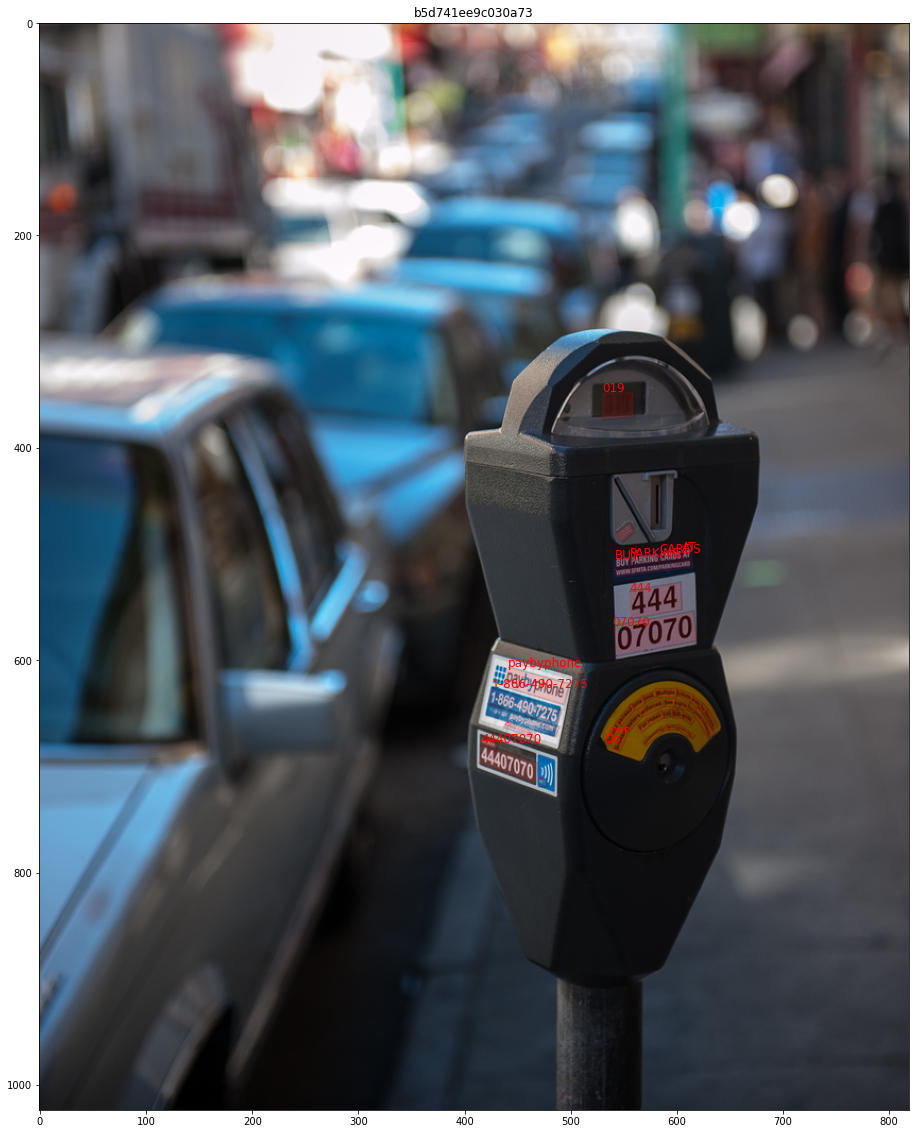

In [7]:
# random.seed(1234)

for image_id in random.choices(list(train_annotation['imgs'].keys()), k = 1):
    show_images(image_id)